<a href="https://colab.research.google.com/github/chisomobanja/metadata-classification/blob/main/metadata_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## 1.1 Problem statement
Many articles published in UNZA journals have incomplete or inconsistent descriptive metadata (e.g., missing author names, publication dates, keywords, abstracts). This makes it difficult for researchers or librarians to correctly cite articles. We need a way to automatically classify the completeness of metadata associated with each article, so we can identify gaps and improve metadata quality.

##1.2 Business Objectives


 1. Automate Metadata Completeness Classification.

 2. Diagnose Metadata Gaps Across UNZA journels.

 3. improve Citation Accuracy and Research Discoverability.

 4. Standaridise Metadata Practices.

 5. Establish Sustainable Metadata Governance.


### 1.2.1 What success might look like in real life :

  - Metadata Completeness where each article recieves a scored ranging from 0% to 100% based on the presence of key metadata.

  - Reduction in Incomplete Records where number of articles with missing metadata drops by a good percentage like 70%.


- Improved Citation Quality where there is a great reduction in citation errors by researchers and librarians.

- Metadata validation reduces manual correction workload by a great percentage.

- Metadata audits and contributor training are institutionalised in various departments.

## 1.3 Translating business objectives into data mining goals
To achieve the above business objectives, our project will focus on developing a robust classification model capable of automatically evaluating the completeness of descriptive metadata for articles in UNZA journals. Specifically:
- Build a supervised classification model that categorizes articles into defined completeness levels — for example:

  -Complete (all required metadata fields present),

  -Partially Complete (some key fields missing),

  -Incomplete (major fields missing).
- Train and validate the model using historical article metadata records, where completeness has been manually assessed, ensuring the model can generalize to new, unseen records.
- Leverage appropriate features from metadata fields such as title, author(s), publication date, keywords, abstract, DOI, and journal name to determine the completeness score/class.
- Enable metadata quality insights by aggregating classification results to identify common gaps across journals, which will guide targeted improvements and policy enforcement.
- Set measurable model performance targets — e.g., at least 85% classification accuracy for predicting completeness categories on test data.

## 1.4 Initial Project Success Criteria
We’ll know our project is successful when we can clearly see improvements in both the quality of metadata and the ease of managing it. Specifically:

1. ### Accurate classifications
   Our model should correctly predict whether an article’s metadata is complete, partially complete, or incomplete at least 85% of the time. It should also be especially reliable in spotting incomplete records, with precision and recall above 80%.

2. ### Trustworthy completeness scores
   When we compare the system’s completeness scores to manual librarian checks, the difference should be very small ideally less than 5%.

3. ### Noticeable improvement in records  
   Within a period of time, the number of articles with missing or incomplete metadata should drop by at least half in the journals we focus on.

4. ### Smooth workflow integration  
   The tool should fit into the existing UNZA journal processes without slowing things down, allowing continuous checks without extra hassle.

5. ### Positive user feedback  
   Librarians, editors, and contributors should find the tool easy to use and report that it saves them time and reduces the amount of manual fixing they have to do.


##1.5 Next Steps

To move forward, we will begin by collecting and preparing metadata samples from existing UNZA journal articles. This includes labelling records for completeness and identifying key metadata fields. We will then design and test initial classification models, refining them based on performance metrics. Parallel to model development, we’ll engage stakeholders (librarians, editors, contributors) to ensure the solution aligns with their workflows and needs. Once validated, the tool will be piloted on select journals before broader deployment.

# 2. Data Understanding


In [12]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
drive.mount('/content/drive')

# Loading the dataset the dataset using the correct path
var_dataset = pd.read_csv('/content/drive/.shortcut-targets-by-id/1BTuOqdVlsllIxOpwU9o5LGYwxkxuPLWL/misc-unza25-csc4792-project_team7/Metadata_classification_dataset - Sheet1.csv')

print(" Dataset loaded successfully!")
print(f"Shape: {var_dataset.shape}")

Mounted at /content/drive
 Dataset loaded successfully!
Shape: (259, 11)


In [13]:
var_dataset.head()

,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL
0,Politics of gender in sports administration an...,2021-06-30,Mbale G Tamela; Madalitso K Banja,JAE_001,This was a phenomenological study aimed at inv...,"Access to opportunities, gender, gender stereo...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
1,Distance education students’ experiences of in...,2021-06-30,Musonda Luchembe; Peter C Sampa; Daniel L Mpol...,JAE_002,Although informal learning is an important way...,"Informal learning, informal study group, inter...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
2,Social Cash Transfer mediating socio-economic ...,2021-06-30,Serah Kabamba; Collins C Kayangula; Noah K Sic...,JAE_003,The study aimed at investigating how community...,"Elderly, social inequality mediation, social c...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
3,Theatre for development: a creative strategy f...,2021-06-30,Brian Kombe; Emmy H Mbozi,JAE_004,This article is based on a study that sought t...,"Theatre for Development, community, Conscienti...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
4,"Youth and adult literacy in Zambia, alternativ...",2021-06-30,Choolwe Kang'ombe; Noah K Sichula,JAE_005,This qualitative exploratory article attempted...,"Adult literacy, adult literacy policy, curricu...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...


In [14]:
print(f"Shape: {var_dataset.shape}")

Shape: (259, 11)


In [15]:
print("DATASET OVERVIEW ") #Checking the names of the columns
print(f"Dataset Shape: {var_dataset.shape}")
print(f"Number of Rows: {var_dataset.shape[0]}")
print(f"Number of Columns: {var_dataset.shape[1]}")
print("\nColumn Names:")
for i, col in enumerate(var_dataset.columns, 1):
    print(f"{i}. {col}")

DATASET OVERVIEW 
Dataset Shape: (259, 11)
Number of Rows: 259
Number of Columns: 11

Column Names:
1. Title
2. Date Published
3. Authors
4. Article_ID
5. Abstract
6. Keywords
7. Journal
8. Issue
9. Volume
10. DOI
11. URL


In [16]:
var_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           259 non-null    object
 1   Date Published  258 non-null    object
 2   Authors         257 non-null    object
 3   Article_ID      259 non-null    object
 4   Abstract        257 non-null    object
 5   Keywords        240 non-null    object
 6   Journal         259 non-null    object
 7   Issue           259 non-null    int64 
 8   Volume          259 non-null    int64 
 9   DOI             52 non-null     object
 10  URL             259 non-null    object
dtypes: int64(2), object(9)
memory usage: 22.4+ KB


In [17]:
var_dataset.describe(include='all') #Descriptive statistics

,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL
count,259,258,257,259,257,240,259,259.000000,259.000000,52,259
unique,257,94,252,259,257,240,14,NaN,NaN,52,259
top,EDITORIAL COMMENT,2023-08-09,Cheela Chilala,ZJOCI_025,In exploring agency and phenomenology in the f...,"Access to opportunities, gender, gender stereo...",Multidisciplinary Journal of Language and Soci...,NaN,NaN,https://doi.org/10.53974/unza.jabs.9.2.1399,https://journals.unza.zm/index.php/ZJOCI/artic...
freq,2,16,2,1,1,1,25,NaN,NaN,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.957529,6.841699,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.432651,7.289291,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,7.000000,NaN,NaN


In [18]:
print("DATA QUALITY ANALYSIS")
print("\n This is an analysis of missing values:")

missing_data = var_dataset.isnull().sum()
missing_percentage = (missing_data / len(var_dataset)) * 100

quality_df = pd.DataFrame({
    'Column': var_dataset.columns,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print(quality_df.to_string(index=False))

DATA QUALITY ANALYSIS

 This is an analysis of missing values:
        Column  Missing_Count  Missing_Percentage
           DOI            207           79.922780
      Keywords             19            7.335907
       Authors              2            0.772201
      Abstract              2            0.772201
Date Published              1            0.386100
         Title              0            0.000000
    Article_ID              0            0.000000
       Journal              0            0.000000
         Issue              0            0.000000
        Volume              0            0.000000
           URL              0            0.000000


The dataset 259 academic articles with 11 columns including titles, abstracts, authors, and journal metadata. The missing data is mostly in the DOI's and Keywords with a few missing in 3 other categories. Other than that, the dataset does not have many many missing values.

In [19]:
print ("This show a sample of the dataset giving out 10 randomly picked articles")

var_dataset.sample(10)

This show a sample of the dataset giving out 10 randomly picked articles


,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL
62,Acquiring Reading Skills in Languages with Var...,2023-12-30,Bestern Kaani; R. Malatesha Joshi,jlt_010,This study sought to assess the influence of o...,"English, Language, Cinyanja, Orthographic dept...",Journal of Lexicography and Terminology,2,7,NaN,https://journals.unza.zm/index.php/jlt/article...
149,A Comparative Analysis of the Perceptions of P...,2020-11-20,Kenneth Kapalu Muzata; Madalitso Khulupilika B...,ZIJE_010,This study was a comparative analysis of the p...,"Quality Education, Perceptions, Education Stan...",Zambia Interdisciplinary Journal of Education,1,1,NaN,https://journals.unza.zm/index.php/ZIJE/articl...
81,Establishing the Implementation of Comprehensi...,2022-11-08,Remmy Mukonka; Christine Mushibwe; David Sani ...,mjlsse_004,Despite the full-scale implementation of Compr...,"sexuality, education, implementation, adolesce...",Multidisciplinary Journal of Language and Soci...,2,5,NaN,https://journals.unza.zm/index.php/mjlsse/arti...
237,NARRATIVISATION OF SPACE IN NERVOUS CONDITION ...,1 OF 2024,Joseph Chabushiku S. Sapwe,ZJOCI_004,The objective of this article was the narrativ...,"Space, Time, Colonialism, Racism, Hybridity, A...",ZANGO: Zambian Journal of Contemporary Issues,1,1,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
166,Assessing Soft Skills among Students with Disa...,2019-04-12,kenneth K Muzata; MKZ,ZAJE_015,This paper presents results of a study conduct...,NaN,Zambia Journal of Education,1,5,NaN,https://journals.unza.zm/index.php/ZAJE/articl...
231,The Forfeiture of War Medals to The Crown: The...,48 No 2018,Fatima Mandhu; Peter Ronald Oliver Jones; Char...,ZLJ_004,The British Army recognises the brave and chiv...,NaN,Zambia Law Journal,1,1,NaN,https://journals.unza.zm/index.php/ZLJ/article...
100,Implementation of the Communicative Approach T...,2021-10-02,Elias Amsini Mukayi; Peter Chomba Manchishi,mjlsse_023,French has been taught in Zambia as a Foreign ...,"Communicative Approach, Communicative Competen...",Multidisciplinary Journal of Language and Soci...,2,4,NaN,https://journals.unza.zm/index.php/mjlsse/arti...
12,Functional literacy-related challenges faced b...,2019-11-29,Agatha Kasonde; Moses Changala,JAE_013,The purpose of this study was to explore the f...,"Functional literacy, Literacies, Women entrepr...",Journal of Adult Education,2,1,NaN,https://journals.unza.zm/index.php/JAE/article...
0,Politics of gender in sports administration an...,2021-06-30,Mbale G Tamela; Madalitso K Banja,JAE_001,This was a phenomenological study aimed at inv...,"Access to opportunities, gender, gender stereo...",Journal of Adult Education,2,2,NaN,https://journals.unza.zm/index.php/JAE/article...
84,Factors Contributing to Low Performance in Eng...,2022-11-08,Akayombokwa Maala; Sitwe Benson Mkandawire,mjlsse_007,This article investigated factors contributing...,"Reading comprehension, poor reading, poor perf...",Multidisciplinary Journal of Language and Soci...,2,5,NaN,https://journals.unza.zm/index.php/mjlsse/arti...


In [20]:
print('This shows the last five entries in the data set ')
var_dataset.tail()

This shows the last five entries in the data set 


,Title,Date Published,Authors,Article_ID,Abstract,Keywords,Journal,Issue,Volume,DOI,URL
254,MATERIAL NARRATION OF NOSTALGIA AND MODALITY I...,2023-08-09,Hambaba Jimaima; Gabriel Simungala; Trevor Mwansa,ZJOCI_021,Conflating the theoretical ‘givings’ of modali...,"Affect, Modality, Memory, Nostalgia, Reimaging...",ZANGO: Zambian Journal of Contemporary Issues,2,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
255,THE FIGURATIVE LANGUAGE OF SEXUAL PERFORMANCE:...,2023-08-09,Charity Khondowe; Gankhanani Moffat Moyo,ZJOCI_022,Abstract This article examined the figurative ...,"Figurative Analysis, Cinamwali Sexual Performa...",ZANGO: Zambian Journal of Contemporary Issues,2,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
256,RESEMIOTISATION AND INTERTEXTUALITY IN MUSICAL...,2023-08-09,Gabriel Simungala; Hambaba Jimaima; Trevor Mwansa,ZJOCI_023,"We draw on ‘Dununa Reverse’, the Patriotic Fro...","Patriotic Front, Musicology, Campaign Song, Za...",ZANGO: Zambian Journal of Contemporary Issues,2,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
257,"INTERROGATING MOSES SAKALA’S FUNERAL SONG, ‘CH...",2023-08-09,Naomi Njobvu; Kelvin Mambwe; Hambaba Jimaima,ZJOCI_024,Funeral songs are a type of discourse commonly...,"Funeral Song, Discourse Analysis, Music, Pain,...",ZANGO: Zambian Journal of Contemporary Issues,2,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...
258,DICTION AND SYMBOLISM IN SISTA D’S VITENDENI: ...,2023-08-09,Hambaba Jimaima; Naomi Njobvu,ZJOCI_025,In exploring agency and phenomenology in the f...,"Agency, Diction, Phenomenology, Semiotics, Sym...",ZANGO: Zambian Journal of Contemporary Issues,2,34,NaN,https://journals.unza.zm/index.php/ZJOCI/artic...


In [21]:
var_dataset.dtypes

,0
Title,object
Date Published,object
Authors,object
Article_ID,object
Abstract,object
Keywords,object
Journal,object
Issue,int64
Volume,int64
DOI,object


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

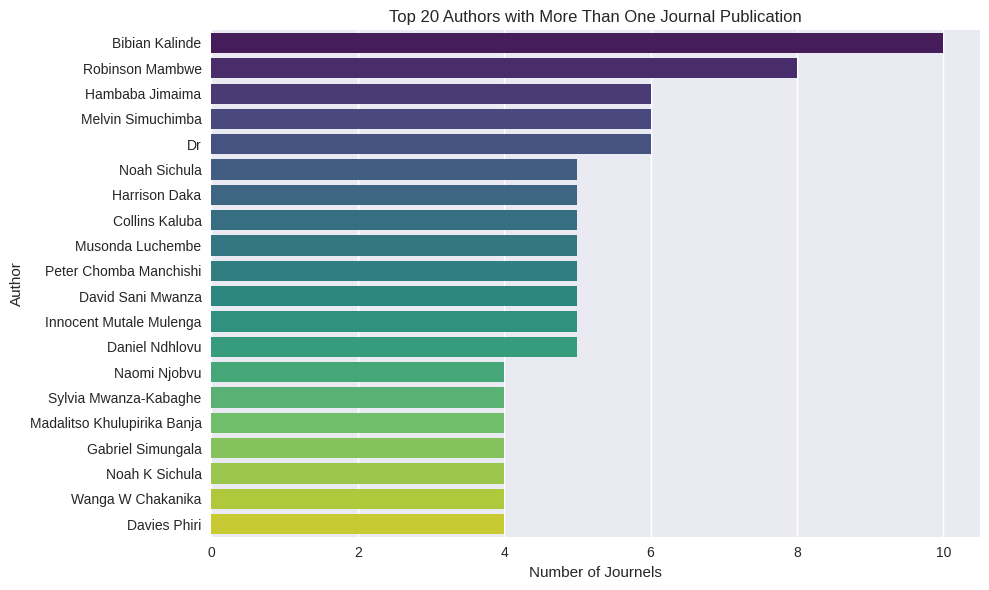

In [23]:
from collections import Counter


# Split authors using semicolon or comma
authors_list = var_dataset['Authors'].dropna().str.split(';|,').sum()

# Clean whitespace and remove empty strings
authors_list = [a.strip() for a in authors_list if a.strip() != ""]

# Count author frequencies
author_counts = Counter(authors_list)

# Filter authors with more than one publication
filtered_authors = {author: count for author, count in author_counts.items() if count > 1}

# Convert to DataFrame and sort
top_authors = pd.DataFrame(filtered_authors.items(), columns=['author', 'num_Journel'])
top_authors = top_authors.sort_values(by='num_Journel', ascending=False)

top_authors = top_authors.head(20)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_authors, x='num_Journel', y='author', palette='viridis')
plt.title("Top 20 Authors with More Than One Journal Publication")
plt.xlabel("Number of Journels")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

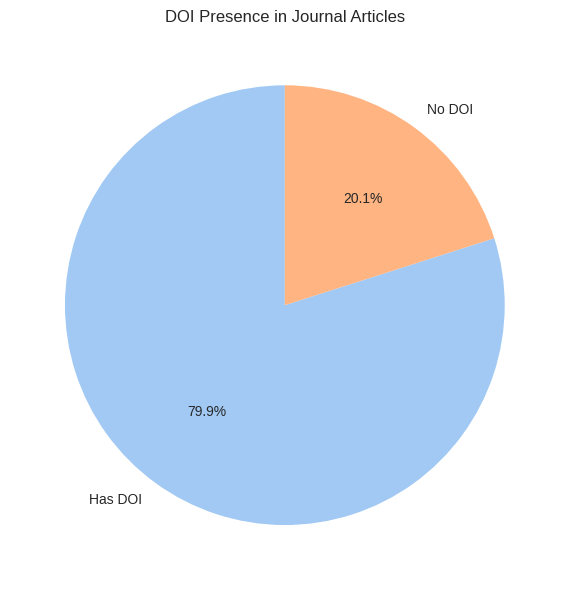

In [24]:


# Check for valid DOIs (non-null and non-empty)
has_doi = var_dataset['DOI'].notna() & (var_dataset['DOI'].astype(str).str.strip() != '')
doi_counts = has_doi.value_counts()

# Prepare labels and colors
labels = ['Has DOI', 'No DOI']
colors = sns.color_palette('pastel')[0:2]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(doi_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('DOI Presence in Journal Articles')
plt.tight_layout()
plt.show()


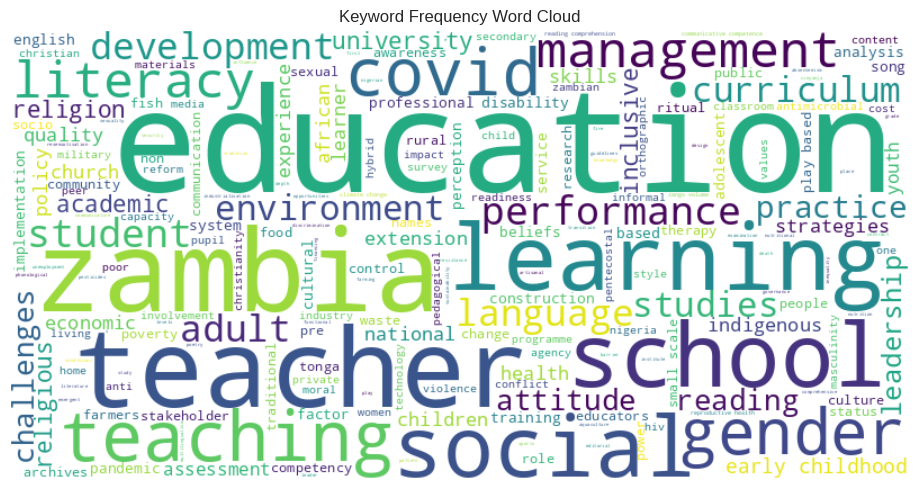

In [25]:
from wordcloud import WordCloud

# Combine all keywords into one string
keywords_text = var_dataset['Keywords'].dropna().astype(str).str.lower().str.cat(sep=';')

# Split and clean
keywords_list = [kw.strip() for kw in keywords_text.split(';') if kw.strip() != '']
keywords_string = ' '.join(keywords_list)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(keywords_string)

# Plot
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Frequency Word Cloud')
plt.tight_layout()
plt.show()


###Publication Year Distribution (Histogram / Line Plot)




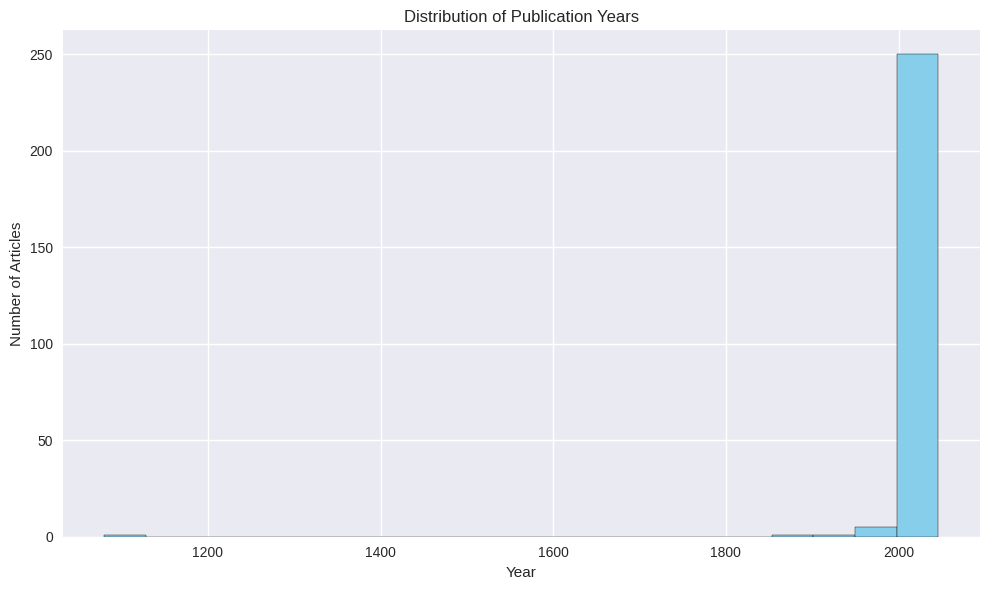

In [27]:
import matplotlib.pyplot as plt

# Extract year from 'Date Published' column and handle potential errors
# Convert to numeric, coercing errors to NaN, then drop NaNs
var_dataset['Year'] = pd.to_numeric(var_dataset['Date Published'].str.extract(r'(\d{4})', expand=False), errors='coerce')

plt.figure(figsize=(10,6))
var_dataset['Year'].dropna().astype(int).hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

What it does: Shows how many articles were published in each year.

Why useful: Helps spot publication trends over time (e.g., growth or decline of journal outputs).

###Articles per Journal (Bar Chart – Top 15)

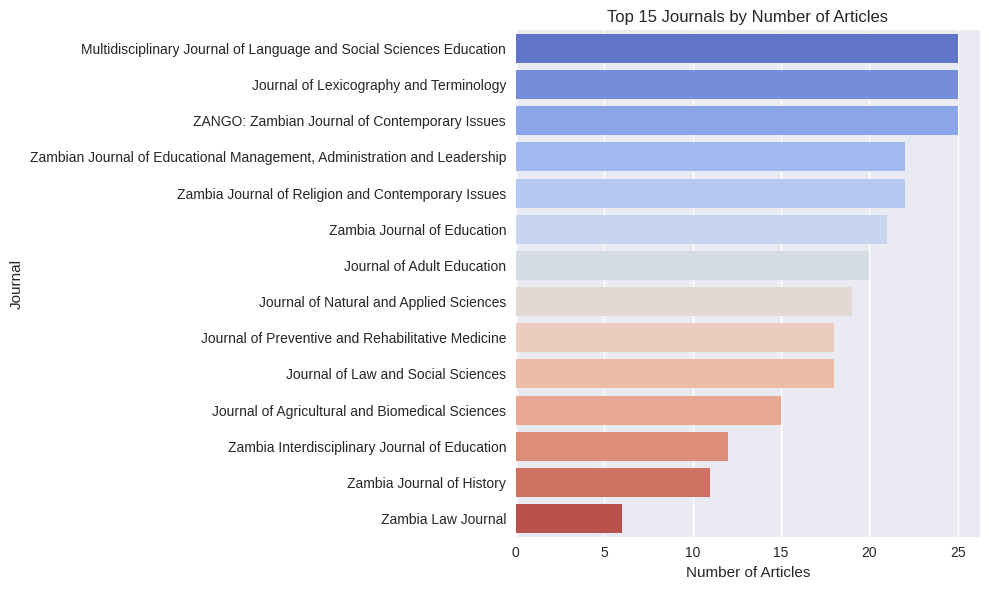

In [28]:
top_journals = var_dataset['Journal'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette='coolwarm')
plt.title('Top 15 Journals by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Journal')
plt.tight_layout()
plt.show()


What it does: Displays the journals with the highest number of articles in the dataset.

Why useful: Highlights which journals are the most active or most represented in UNZA publications.

###Articles per Author Count (Histogram of Collaboration)

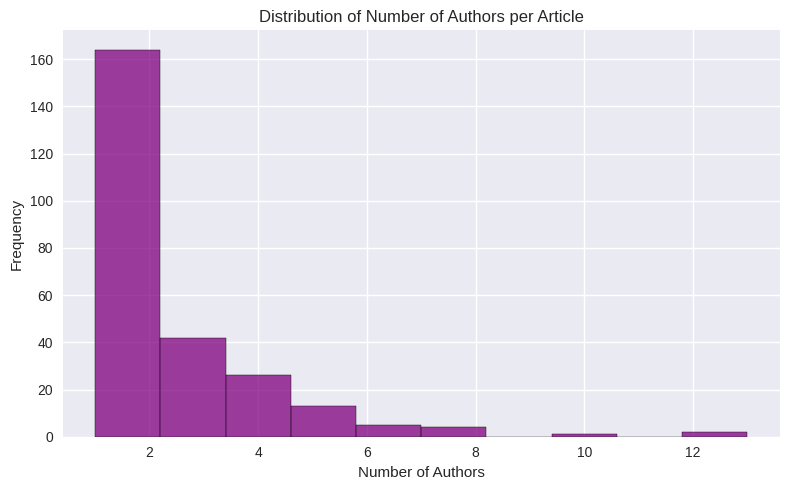

In [29]:
author_counts_per_paper = var_dataset['Authors'].dropna().apply(lambda x: len(x.split(';')))
plt.figure(figsize=(8,5))
sns.histplot(author_counts_per_paper, bins=10, kde=False, color='purple')
plt.title('Distribution of Number of Authors per Article')
plt.xlabel('Number of Authors')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


What it does: Plots the distribution of how many authors contributed to each article.

Why useful: Gives insight into collaboration patterns — whether research is mostly single-authored or team-based.

###Abstract Length Distribution (Histogram)

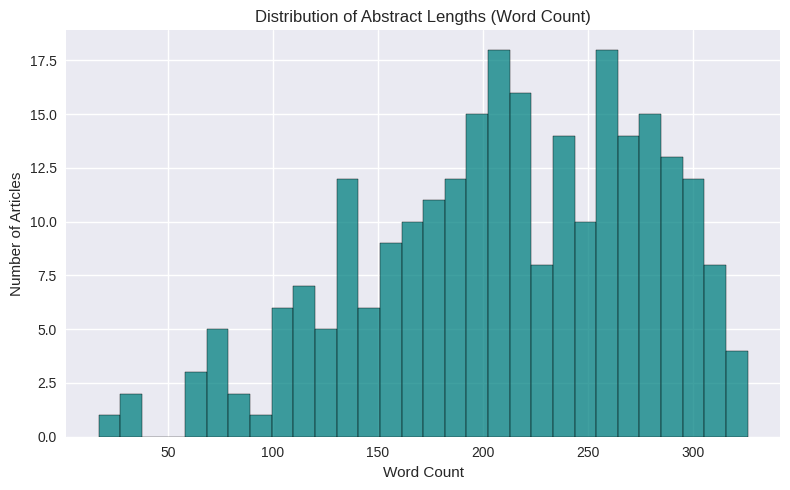

In [31]:
abstract_lengths = var_dataset['Abstract'].dropna().apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.histplot(abstract_lengths, bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Abstract Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()



What it does: Measures how long abstracts are (in word counts).

Why useful: Identifies consistency of abstracts. For example, very short abstracts might indicate incomplete metadata.

###Missing Values Heatmap

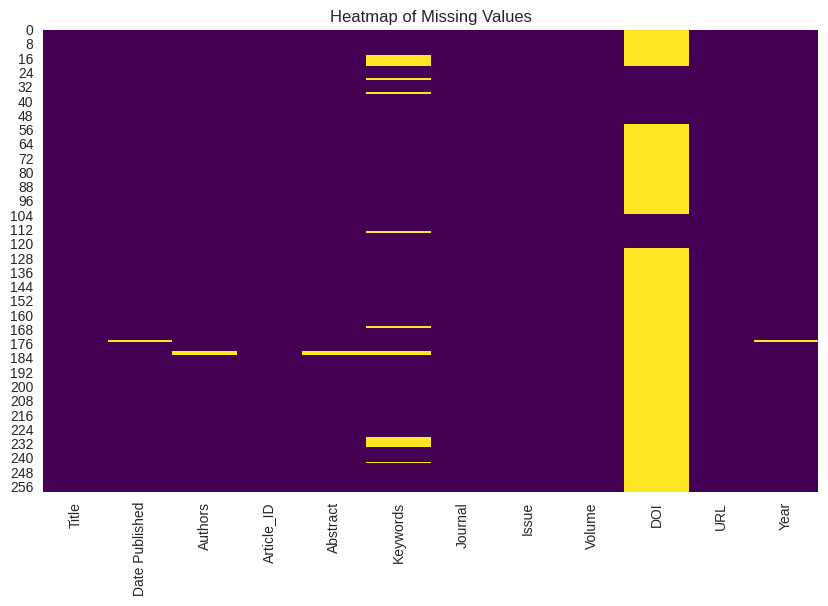

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(var_dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


What it does: Visually marks missing values in the dataset with a heatmap.

Why useful: Quickly shows which fields (columns) have the most missing data, helping focus on data cleaning and metadata completeness.

###Correlation Heatmap (Numerical Columns Only)

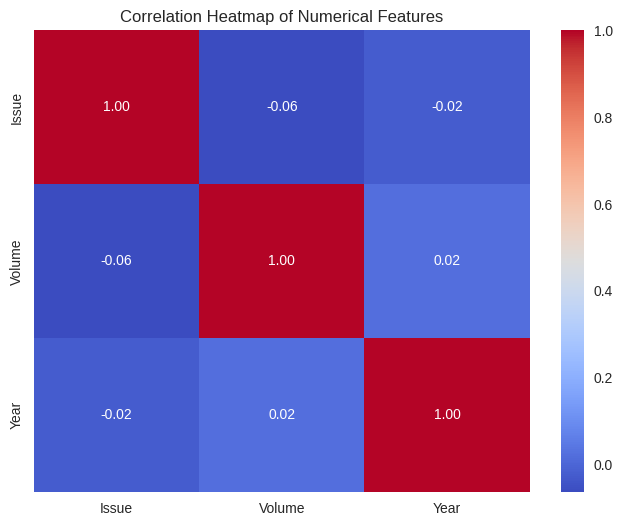

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(var_dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


What it does: Shows the correlation (relationship strength) between numerical attributes.

Why useful: Helps detect whether any numerical features are related, which may influence model design or feature engineering.